In [408]:
import pandas as pd
import numpy as np
import random as rd
import scipy.stats
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

In [397]:
### Loading the data
df = pd.read_csv("C:/Users/andre/Documents/Analysis_Projects/FinalProject/owid-covid-data.csv")
df.head()

### We also want to make sure we fix the date column.
df["date"] = pd.to_datetime(df["date"])
df.replace(np.nan, 0, inplace = True)
countries_df = df[df.continent != 0]
countries_df = countries_df.loc[countries_df["location"] != countries_df["continent"]]

In [398]:
### Take only the columns we want

countries_df = countries_df[["iso_code", "continent", "location", "date", "new_cases", "new_deaths", "total_cases", "total_deaths", "reproduction_rate", "hosp_patients", "new_tests", "total_tests", "positive_rate", "new_vaccinations", "population", "median_age", "hospital_beds_per_thousand" ]]

countries_df.head()

,iso_code,continent,location,date,new_cases,new_deaths,total_cases,total_deaths,reproduction_rate,hosp_patients,new_tests,total_tests,positive_rate,new_vaccinations,population,median_age,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2020-02-24,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5
1,AFG,Asia,Afghanistan,2020-02-25,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5
2,AFG,Asia,Afghanistan,2020-02-26,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5
3,AFG,Asia,Afghanistan,2020-02-27,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5
4,AFG,Asia,Afghanistan,2020-02-28,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,18.6,0.5


In [4]:
### In order to clean this data, we didn't want to drop the null so we decided to replace it with zero instead.
countries_df.to_csv("cleaned_data_andrea.csv", index = False)

In [5]:
### Grouping the countries in levels of risk of COVID by looking at the total cases.

grouped_df = countries_df.groupby("location")
grouped_lists = grouped_df["total_cases"].mean()
grouped_lists = grouped_lists.reset_index()

# grouped_lists.describe()

grouped_lists = grouped_lists.sort_values(by=["total_cases"])

# Grouping the list by aver  age of total_cases
low = grouped_lists[0:75]
med = grouped_lists[75:150]
high = grouped_lists[150:]

In [6]:
# Creating a new column to determine
countries_df['risk_level'] = ['low' if x<=max(low["total_cases"]) else 'med' if min(med["total_cases"])<=x<=max(med["total_cases"]) else 'high' for x in countries_df['total_cases']]

In [7]:
low["location"].unique()

array(['Sint Maarten (Dutch part)', 'Niue', 'Tokelau', 'Northern Cyprus',
       'Turkmenistan', 'Tuvalu', 'Guernsey', 'Jersey', 'Nauru',
       'Pitcairn', 'Tonga', 'Micronesia (country)', 'Cook Islands',
       'Kiribati', 'Samoa', 'Vanuatu', 'Saint Helena', 'Marshall Islands',
       'Palau', 'Solomon Islands', 'Vatican', 'Montserrat',
       'Saint Pierre and Miquelon', 'Falkland Islands', 'Macao',
       'Anguilla', 'Wallis and Futuna', 'Greenland',
       'Saint Kitts and Nevis', 'British Virgin Islands',
       'Bonaire Sint Eustatius and Saba', 'Faeroe Islands', 'Bhutan',
       'Dominica', 'Antigua and Barbuda', 'Cayman Islands', 'Grenada',
       'Turks and Caicos Islands', 'Saint Vincent and the Grenadines',
       'Monaco', 'Sao Tome and Principe', 'Bermuda', 'New Caledonia',
       'Liechtenstein', 'Comoros', 'Brunei', 'Liberia', 'Isle of Man',
       'Gibraltar', 'Chad', 'Eritrea', 'San Marino', 'New Zealand',
       'Guinea-Bissau', 'Sierra Leone', 'Niger', 'Saint Lucia'

In [8]:
med["location"].unique()

array(['Benin', 'Burkina Faso', 'Congo', 'Andorra', 'Mali', 'Lesotho',
       'Bahamas', 'Papua New Guinea', 'Somalia', 'Togo', 'Belize',
       'Tajikistan', 'Fiji', 'Haiti', 'Laos', 'Guyana', 'Suriname',
       'Gabon', 'Guinea', 'Mauritania', 'Syria', 'French Polynesia',
       'Cape Verde', 'Eswatini', 'Malta', 'Trinidad and Tobago', 'Sudan',
       'Madagascar', 'Angola', 'Democratic Republic of Congo', 'Malawi',
       'Cambodia', "Cote d'Ivoire", 'Senegal', 'Jamaica', 'Rwanda',
       'Maldives', 'Luxembourg', 'Cameroon', 'Uganda', 'Cyprus',
       'Zimbabwe', 'Namibia', 'El Salvador', 'Mozambique', 'Botswana',
       'Montenegro', 'Finland', 'Ghana', 'Kosovo', 'Afghanistan',
       'Australia', 'Estonia', 'Singapore', 'Albania', 'Latvia', 'China',
       'Uzbekistan', 'Zambia', 'Kyrgyzstan', 'Mongolia', 'Norway',
       'North Macedonia', 'Algeria', 'Nigeria', 'Kenya',
       'Bosnia and Herzegovina', 'South Korea', 'Bahrain', 'Libya',
       'Armenia', 'Slovenia', 'Qatar', 'Ur

In [9]:
high["location"].unique()

array(['Sri Lanka', 'Moldova', 'Egypt', 'Honduras', 'Ethiopia',
       'Lithuania', 'Venezuela', 'Myanmar', 'Palestine', 'Denmark',
       'Dominican Republic', 'Paraguay', 'Kuwait', 'Ireland', 'Guatemala',
       'Croatia', 'Vietnam', 'Azerbaijan', 'Costa Rica', 'Cuba',
       'Bolivia', 'Panama', 'Bulgaria', 'Belarus', 'Ecuador', 'Tunisia',
       'Georgia', 'Greece', 'Lebanon', 'Nepal', 'United Arab Emirates',
       'Saudi Arabia', 'Kazakhstan', 'Morocco', 'Jordan', 'Austria',
       'Thailand', 'Hungary', 'Serbia', 'Slovakia', 'Switzerland',
       'Japan', 'Portugal', 'Sweden', 'Israel', 'Pakistan', 'Malaysia',
       'Bangladesh', 'Belgium', 'Romania', 'Canada', 'Iraq', 'Chile',
       'Philippines', 'Czechia', 'Netherlands', 'Peru', 'South Africa',
       'Ukraine', 'Indonesia', 'Poland', 'Mexico', 'Iran', 'Germany',
       'Argentina', 'Colombia', 'Italy', 'Spain', 'Turkey', 'France',
       'United Kingdom', 'Russia', 'Brazil', 'India', 'United States'],
      dtype=object)

In [10]:
### Get 3 countries out of each
def pick_three():
    a = []
    
    low_cn = low.sample()
    low_cn = low_cn["location"].to_string()
    
    med_cn = med.sample()
    med_cn = med_cn["location"].to_string()
    
    high_cn = high.sample()
    high_cn = high_cn["location"].to_string()
    
    a.append(low_cn)
    a.append(med_cn)
    a.append(high_cn)
    
    new = []
    for index in a:
        for i,x in enumerate(index):
            if x.isalpha():      #True if its a letter
                pos = i 
                break
        b = index[pos:]
        new.append(b)
    
    return new

In [196]:
### Testing the function pick_three()
a = pick_three()
a

['Iceland', 'Montenegro', 'Sweden']

In [100]:
### Now we can get to the ML Model

In [13]:
def make_df():
    countries = pick_three()
    new_df = pd.DataFrame(columns = countries_df.columns)
    entries = []

    for i in countries_df["location"]:
        if i in countries:
            entry = countries_df.loc[countries_df['location'] == i]
            entries.append(entry)

    found_df = pd.concat(entries)
    result_df = pd.concat([new_df, found_df])
    
    return result_df

In [14]:
### Now, we obviously want to see the correlation
def tests_vs_cases():
    a = make_df()
    data1 = a.loc[a["location"] == a["location"].unique()[0]]
    data2 = a.loc[a["location"] == a["location"].unique()[1]]
    data3 = a.loc[a["location"] == a["location"].unique()[2]]
    
    data1_col1 = data1["new_tests"]
    data1_col2 = data1["new_cases"]

    data2_col1 = data2["new_tests"]
    data2_col2 = data2["new_cases"]

    data3_col1 = data3["new_tests"]
    data3_col2 = data3["new_cases"]

    data1_corr = data1_col1.corr(data1_col2, method = "pearson")
    data2_corr = data2_col1.corr(data2_col2, method = "pearson")
    data3_corr = data3_col1.corr(data3_col2, method = "pearson")
        
    
    ### Now let's see if we can obtain the entire summary statistics for the linear regression model.
    total_tests_1 = data1_col1.to_list()
    total_cases_1 = data1_col2.to_list()
    total_tests_1, total_cases_1 = np.array(total_tests_1), np.array(total_cases_1)
    total_tests_1 = sm.add_constant(total_tests_1)
    model1 = sm.OLS(total_cases_1, total_tests_1)
    results1 = model1.fit()
    
    
    print(f"Low Risk: The correlation coefficient between the new tests administered and the new cases in " + data1["location"].unique()[0] + " is " + str(data1_corr))
    print("------------------------------------------------------------------------------------------------")
   # print(f"Model summary for: " + data1["location"].unique()[0] + ".")
   # print(results1.summary())
   # print("------------------------------------------------------------------------------------------------")

    
    total_tests_2 = data2_col1.to_list()
    total_cases_2 = data2_col2.to_list()
    total_tests_2, total_cases_2 = np.array(total_tests_2), np.array(total_cases_2)
    total_tests_2 = sm.add_constant(total_tests_2)
    model2 = sm.OLS(total_cases_2, total_tests_2)
    results2 = model2.fit()
    
    print(f"Med Risk: The correlation coefficient between the new tests administered and the new cases in " + data2["location"].unique()[0] + " is " + str(data2_corr))
    print("------------------------------------------------------------------------------------------------")
   # print(f"Model summary for: " + data2["location"].unique()[0] + ".")
   # print(results2.summary())
  #  print("------------------------------------------------------------------------------------------------")

    total_tests_3 = data3_col1.to_list()
    total_cases_3 = data3_col2.to_list()
    total_tests_3, total_cases_3 = np.array(total_tests_3), np.array(total_cases_3)
    total_tests_3 = sm.add_constant(total_tests_3)
    model3 = sm.OLS(total_cases_3, total_tests_3)
    results3 = model3.fit()
    
    print(f"High Risk: The correlation coefficient between the new tests administered and the new cases in " + data3["location"].unique()[0] + " is " + str(data3_corr))
    print("------------------------------------------------------------------------------------------------")    
  #  print(f"Model summary for: " + data3["location"].unique()[0] + ".")
   # print(results3.summary())
    #print("------------------------------------------------------------------------------------------------")

    return a

In [15]:
test = tests_vs_cases()

Low Risk: The correlation coefficient between the new tests administered and the new cases in Botswana is -0.05862765992879092
------------------------------------------------------------------------------------------------
Med Risk: The correlation coefficient between the new tests administered and the new cases in Costa Rica is 0.3174707541737924
------------------------------------------------------------------------------------------------
High Risk: The correlation coefficient between the new tests administered and the new cases in New Caledonia is nan
------------------------------------------------------------------------------------------------


# Now we will move on to seeing whether the tests and deaths

In [277]:
def tests_vs_deaths():
    a = make_df()
    data1 = a.loc[a["location"] == a["location"].unique()[0]]
    data2 = a.loc[a["location"] == a["location"].unique()[1]]
    data3 = a.loc[a["location"] == a["location"].unique()[2]]
    
    data1_col1 = data1["new_tests"]
    data1_col2 = data1["new_deaths"]

    data2_col1 = data2["new_tests"]
    data2_col2 = data2["new_deaths"]

    data3_col1 = data3["new_tests"]
    data3_col2 = data3["new_deaths"]

    data1_corr = data1_col1.corr(data1_col2, method = "pearson")
    data2_corr = data2_col1.corr(data2_col2, method = "pearson")
    data3_corr = data3_col1.corr(data3_col2, method = "pearson")
        
    
    ### Now let's see if we can obtain the entire summary statistics for the linear regression model.
    total_tests_1 = data1_col1.to_list()
    total_deaths_1 = data1_col2.to_list()
    total_tests_1, total_deaths_1 = np.array(total_tests_1), np.array(total_deaths_1)
    total_tests_1 = sm.add_constant(total_tests_1)
    model1 = sm.OLS(total_deaths_1, total_tests_1)
    results1 = model1.fit()
    
    print(f"Low Risk: The correlation coefficient between the new tests administered and the new deaths in " + data1["location"].unique()[0] + " is " + str(data1_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data1["location"].unique()[0] + ".")
 #   print(results1.summary())
  #  print("------------------------------------------------------------------------------------------------")

    
    total_tests_2 = data2_col1.to_list()
    total_deaths_2 = data2_col2.to_list()
    total_tests_2, total_deaths_2 = np.array(total_tests_2), np.array(total_deaths_2)
    total_tests_2 = sm.add_constant(total_tests_2)
    model2 = sm.OLS(total_deaths_2, total_tests_2)
    results2 = model2.fit()
    
    print(f"Med Risk: The correlation coefficient between the new tests administered and the new deaths in " + data2["location"].unique()[0] + " is " + str(data2_corr))
    print("------------------------------------------------------------------------------------------------")
 #   print(f"Model summary for: " + data2["location"].unique()[0] + ".")
  #  print(results2.summary())
   # print("------------------------------------------------------------------------------------------------")

    total_tests_3 = data3_col1.to_list()
    total_deaths_3 = data3_col2.to_list()
    total_tests_3, total_deaths_3 = np.array(total_tests_3), np.array(total_deaths_3)
    total_tests_3 = sm.add_constant(total_tests_3)
    model3 = sm.OLS(total_deaths_3, total_tests_3)
    results3 = model3.fit()
    
    print(f"High Risk: The correlation coefficient between the new tests administered and the new deaths in " + data3["location"].unique()[0] + " is " + str(data3_corr))
    print("------------------------------------------------------------------------------------------------")    
#    print(f"Model summary for: " + data3["location"].unique()[0] + ".")
 #   print(results3.summary())
  #  print("------------------------------------------------------------------------------------------------")

    return a

In [285]:
deaths = tests_vs_deaths()

Low Risk: The correlation coefficient between the new tests administered and the new deaths in Cambodia is 0.3452398733395195
------------------------------------------------------------------------------------------------
Med Risk: The correlation coefficient between the new tests administered and the new deaths in Hong Kong is nan
------------------------------------------------------------------------------------------------
High Risk: The correlation coefficient between the new tests administered and the new deaths in Hungary is 0.7650439575544457
------------------------------------------------------------------------------------------------


In [18]:
def vacs_vs_cases():
    a = make_df()
    data1 = a.loc[a["location"] == a["location"].unique()[0]]
    data2 = a.loc[a["location"] == a["location"].unique()[1]]
    data3 = a.loc[a["location"] == a["location"].unique()[2]]
    
    data1_col1 = data1["new_vaccinations"]
    data1_col2 = data1["total_cases"]

    data2_col1 = data2["new_vaccinations"]
    data2_col2 = data2["total_cases"]

    data3_col1 = data3["new_vaccinations"]
    data3_col2 = data3["total_cases"]

    data1_corr = data1_col1.corr(data1_col2)
    data2_corr = data2_col1.corr(data2_col2)
    data3_corr = data3_col1.corr(data3_col2)
        
    
    ### Now let's see if we can obtain the entire summary statistics for the linear regression model.
    new_vacs_1 = data1_col1.to_list()
    total_cases_1 = data1_col2.to_list()
    new_vacs_1, total_cases_1 = np.array(new_vacs_1), np.array(total_cases_1)
    new_vacs_1 = sm.add_constant(new_vacs_1)
    model1 = sm.OLS(total_cases_1, new_vacs_1)
    results1 = model1.fit()
    
    print(f"Low Risk: The correlation coefficient between the new vaccines administered and the new cases in " + data1["location"].unique()[0] + " is " + str(data1_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data1["location"].unique()[0] + ".")
 #   print(results1.summary())
  #  print("------------------------------------------------------------------------------------------------")

    
    total_tests_2 = data2_col1.to_list()
    total_deaths_2 = data2_col2.to_list()
    total_tests_2, total_deaths_2 = np.array(total_tests_2), np.array(total_deaths_2)
    total_tests_2 = sm.add_constant(total_tests_2)
    model2 = sm.OLS(total_deaths_2, total_tests_2)
    results2 = model2.fit()
    
    print(f"Med Risk: The correlation coefficient between the new vaccines administered and the new cases in " + data2["location"].unique()[0] + " is " + str(data2_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data2["location"].unique()[0] + ".")
 #   print(results2.summary())
  #  print("------------------------------------------------------------------------------------------------")

    total_tests_3 = data3_col1.to_list()
    total_deaths_3 = data3_col2.to_list()
    total_tests_3, total_deaths_3 = np.array(total_tests_3), np.array(total_deaths_3)
    total_tests_3 = sm.add_constant(total_tests_3)
    model3 = sm.OLS(total_deaths_3, total_tests_3)
    results3 = model3.fit()
    
    print(f"High Risk: The correlation coefficient between the new vaccines administered and the new cases in " + data3["location"].unique()[0] + " is " + str(data3_corr))
    print("------------------------------------------------------------------------------------------------")    
#    print(f"Model summary for: " + data3["location"].unique()[0] + ".")
 #   print(results3.summary())
  #  print("------------------------------------------------------------------------------------------------")

    return a

In [309]:
vacscases = vacs_vs_cases()

Low Risk: The correlation coefficient between the new vaccines administered and the new cases in Jamaica is 0.42384152919170526
------------------------------------------------------------------------------------------------
Med Risk: The correlation coefficient between the new vaccines administered and the new cases in Morocco is 0.2049232657148981
------------------------------------------------------------------------------------------------
High Risk: The correlation coefficient between the new vaccines administered and the new cases in Saint Lucia is 0.2383328364959425
------------------------------------------------------------------------------------------------


In [20]:
def vacs_vs_deaths():
    a = make_df()
    data1 = a.loc[a["location"] == a["location"].unique()[0]]
    data2 = a.loc[a["location"] == a["location"].unique()[1]]
    data3 = a.loc[a["location"] == a["location"].unique()[2]]
    
    data1_col1 = data1["new_vaccinations"]
    data1_col2 = data1["new_deaths"]

    data2_col1 = data2["new_vaccinations"]
    data2_col2 = data2["new_deaths"]

    data3_col1 = data3["new_vaccinations"]
    data3_col2 = data3["new_deaths"]

    data1_corr = data1_col1.corr(data1_col2)
    data2_corr = data2_col1.corr(data2_col2)
    data3_corr = data3_col1.corr(data3_col2)
        
    
    ### Now let's see if we can obtain the entire summary statistics for the linear regression model.
    new_vacs_1 = data1_col1.to_list()
    total_deaths_1 = data1_col2.to_list()
    new_vacs_1, total_deaths_1 = np.array(new_vacs_1), np.array(total_deaths_1)
    new_vacs_1 = sm.add_constant(new_vacs_1)
    model1 = sm.OLS(total_deaths_1, new_vacs_1)
    results1 = model1.fit()
    
    print(f"Low Risk: The correlation coefficient between the new vaccinations administered and the new deaths in " + data1["location"].unique()[0] + " is " + str(data1_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data1["location"].unique()[0] + ".")
 #   print(results1.summary())
  #  print("------------------------------------------------------------------------------------------------")

    
    new_vacs_2 = data2_col1.to_list()
    total_deaths_2 = data2_col2.to_list()
    new_vacs_2, total_deaths_2 = np.array(new_vacs_2), np.array(total_deaths_2)
    new_vacs_2 = sm.add_constant(new_vacs_2)
    model2 = sm.OLS(total_deaths_2, new_vacs_2)
    results2 = model2.fit()
    
    print(f"Med Risk: The correlation coefficient between the new vaccinations administered and the new deaths in " + data2["location"].unique()[0] + " is " + str(data2_corr))
    print("------------------------------------------------------------------------------------------------")
#    print(f"Model summary for: " + data2["location"].unique()[0] + ".")
 #   print(results2.summary())
  #  print("------------------------------------------------------------------------------------------------")

    total_tests_3 = data3_col1.to_list()
    total_deaths_3 = data3_col2.to_list()
    total_tests_3, total_deaths_3 = np.array(total_tests_3), np.array(total_deaths_3)
    total_tests_3 = sm.add_constant(total_tests_3)
    model3 = sm.OLS(total_deaths_3, total_tests_3)
    results3 = model3.fit()
    
    print(f"High Risk: The correlation coefficient between the new vaccinations administered and the new deaths in " + data3["location"].unique()[0] + " is " + str(data3_corr))
    print("------------------------------------------------------------------------------------------------")    
 #   print(f"Model summary for: " + data3["location"].unique()[0] + ".")
  #  print(results3.summary())
   # print("------------------------------------------------------------------------------------------------")

    return a

In [21]:
vacsdeaths = vacs_vs_deaths()

Low Risk: The correlation coefficient between the new vaccinations administered and the new deaths in Aruba is 0.04396852175507497
------------------------------------------------------------------------------------------------
Med Risk: The correlation coefficient between the new vaccinations administered and the new deaths in Honduras is 0.03478497413218472
------------------------------------------------------------------------------------------------
High Risk: The correlation coefficient between the new vaccinations administered and the new deaths in South Korea is 0.4038961339853458
------------------------------------------------------------------------------------------------


In [22]:
### These would be used for Tableau

asia_df = countries_df[countries_df["continent"] == "Asia"]
europe_df = countries_df[countries_df["continent"] == "Europe"]
na_df = countries_df[countries_df["continent"] == "North America"]
sa_df = countries_df[countries_df["continent"] == "South America"]
oceania_df = countries_df[countries_df["continent"] == "Oceania"]
africa_df = countries_df[countries_df["continent"] == "Africa"]

#asia_df.to_csv("asia_df.csv", index = False)
#europe_df.to_csv("europe_df.csv", index = False)
#na_df.to_csv("northamerica_df.csv", index = False)
#sa_df.to_csv("southamerica_df.csv", index = False)
#oceania_df.to_csv("oceania_df.csv", index = False)
#africa_df.to_csv("africa_df.csv", index = False)

## Tests vs Cases

In [223]:
Cyprus = countries_df.loc[countries_df["location"] == "Cyprus"]

In [343]:
c_model = ols("new_cases ~ new_tests", data = Cyprus).fit()
print(c_model.summary())

                            OLS Regression Results                            
Dep. Variable:              new_cases   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     399.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           2.86e-70
Time:                        19:35:11   Log-Likelihood:                -5254.2
No. Observations:                 682   AIC:                         1.051e+04
Df Residuals:                     680   BIC:                         1.052e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.7109     28.851     -2.278      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

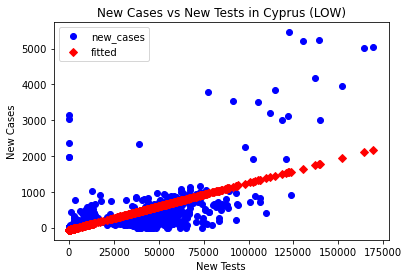

In [266]:
fig1, ax1 = plt.subplots()
fig1 = sm.graphics.plot_fit(c_model,1, vlines= False, ax = ax1)
ax1.set_ylabel("New Cases")
ax1.set_xlabel("New Tests")
ax1.set_title("New Cases vs New Tests in Cyprus (LOW)")
plt.show

In [268]:
US = countries_df.loc[countries_df["location"] == "United States"]

In [344]:
usa_model = ols('new_cases ~ new_tests', data = US).fit()
print(usa_model.summary())

                            OLS Regression Results                            
Dep. Variable:              new_cases   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     202.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           9.56e-41
Time:                        19:35:21   Log-Likelihood:                -9535.9
No. Observations:                 728   AIC:                         1.908e+04
Df Residuals:                     726   BIC:                         1.909e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8398.6613   8354.673     -1.005      0.3

<function matplotlib.pyplot.show(close=None, block=None)>

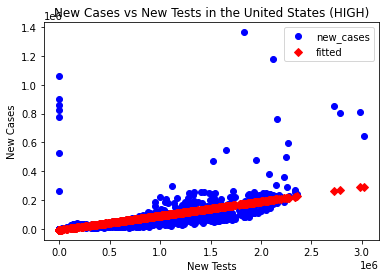

In [271]:
fig2, ax2 = plt.subplots()
fig2 = sm.graphics.plot_fit(usa_model,1, vlines= False, ax = ax2)
ax2.set_ylabel("New Cases")
ax2.set_xlabel("New Tests")
ax2.set_title("New Cases vs New Tests in the United States (HIGH)")
plt.show

## Tests vs Deaths

In [273]:
Zim = countries_df.loc[countries_df["location"] == "Zimbabwe"]

In [341]:
z_model = ols('new_tests ~ new_deaths', data = Zim).fit()
print(z_model.summary())

                            OLS Regression Results                            
Dep. Variable:              new_tests   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     463.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.61e-78
Time:                        19:33:30   Log-Likelihood:                -6129.8
No. Observations:                 670   AIC:                         1.226e+04
Df Residuals:                     668   BIC:                         1.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1725.4079     98.332     17.547      0.0

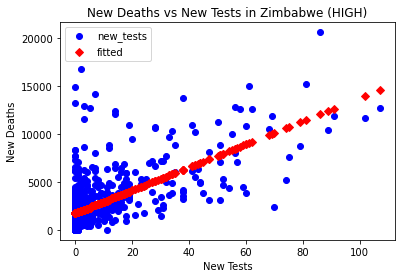

In [275]:
fig3, ax3 = plt.subplots()
fig3 = sm.graphics.plot_fit(z_model,1, vlines= False, ax = ax3)
ax3.set_ylabel("New Deaths")
ax3.set_xlabel("New Tests")
ax3.set_title("New Deaths vs New Tests in Zimbabwe (HIGH)")
plt.show()

In [286]:
hun = countries_df.loc[countries_df["location"] == "Hungary"]

In [342]:
hun_model = ols('new_tests ~ new_deaths', data = hun).fit()
print(hun_model.summary())

                            OLS Regression Results                            
Dep. Variable:              new_tests   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     966.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.75e-133
Time:                        19:33:46   Log-Likelihood:                -7284.3
No. Observations:                 687   AIC:                         1.457e+04
Df Residuals:                     685   BIC:                         1.458e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4843.9868    459.390     10.544      0.0

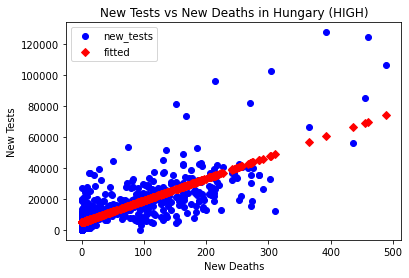

In [291]:
fig5, ax5 = plt.subplots()
fig5 = sm.graphics.plot_fit(hun_model,1, vlines = False, ax = ax5)
ax5.set_ylabel("New Tests")
ax5.set_xlabel("New Deaths")
ax5.set_title("New Tests vs New Deaths in Hungary (HIGH)")
plt.show()

## Vaccinations vs Cases

In [302]:
brazil = countries_df.loc[countries_df["location"] == "Brazil"]

In [345]:
b_model = ols('new_vaccinations ~ new_cases', data = brazil).fit()
print(b_model.summary())

                            OLS Regression Results                            
Dep. Variable:       new_vaccinations   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     13.16
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           0.000307
Time:                        19:36:15   Log-Likelihood:                -10280.
No. Observations:                 693   AIC:                         2.056e+04
Df Residuals:                     691   BIC:                         2.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.767e+05   4.22e+04      8.933      0.0

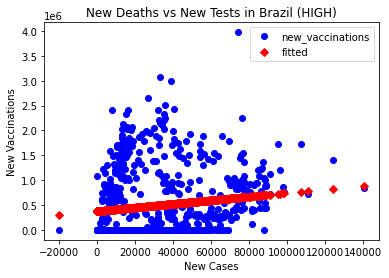

In [304]:
fig4, ax4 = plt.subplots()
fig4 = sm.graphics.plot_fit(b_model,1, vlines= False, ax = ax4)
ax4.set_ylabel("New Vaccinations")
ax4.set_xlabel("New Cases")
ax4.set_title("New Deaths vs New Tests in Brazil (HIGH)")
plt.show()

In [310]:
jam = countries_df[countries_df["location"] == "Jamaica"]

In [346]:
j_model = ols('new_vaccinations ~ new_cases', data = jam).fit()
print(j_model.summary())

                            OLS Regression Results                            
Dep. Variable:       new_vaccinations   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.885
Date:                Tue, 08 Feb 2022   Prob (F-statistic):            0.00889
Time:                        19:36:26   Log-Likelihood:                -6218.4
No. Observations:                 679   AIC:                         1.244e+04
Df Residuals:                     677   BIC:                         1.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    470.8781    105.630      4.458      0.0

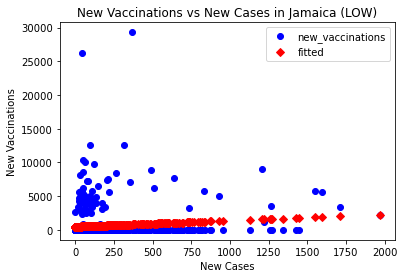

In [313]:
fig6, ax6 = plt.subplots()
fig6 = sm.graphics.plot_fit(j_model, 1, vlines = False, ax = ax6)
ax6.set_ylabel("New Vaccinations")
ax6.set_xlabel("New Cases")
ax6.set_title("New Vaccinations vs New Cases in Jamaica (LOW)")
plt.show()

## Vaccinations vs Deaths

In [321]:
cyp = countries_df.loc[countries_df["location"] == "Cyprus"]

In [347]:
c_model = ols("new_deaths ~ new_vaccinations", data = cyp).fit()
print(c_model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.615
Date:                Tue, 08 Feb 2022   Prob (F-statistic):             0.0321
Time:                        19:37:20   Log-Likelihood:                -1232.6
No. Observations:                 682   AIC:                             2469.
Df Residuals:                     680   BIC:                             2478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9770      0.059  

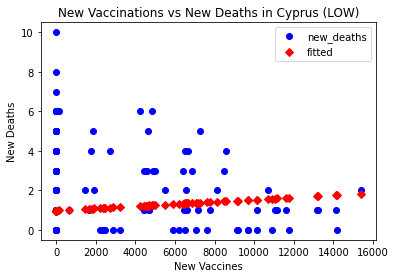

In [326]:
fig7, ax7 = plt.subplots()
fig7 = sm.graphics.plot_fit(c_model,1, vlines = False, ax = ax7)
ax7.set_ylabel("New Deaths")
ax7.set_xlabel("New Vaccines")
ax7.set_title("New Vaccinations vs New Deaths in Cyprus (LOW)")
plt.show()

In [328]:
usa = countries_df.loc[countries_df["location"] == "United States"]

In [348]:
usa_model = ols("new_deaths ~ new_vaccinations", data = usa).fit()
print(usa_model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     40.85
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           2.93e-10
Time:                        19:37:31   Log-Likelihood:                -6008.2
No. Observations:                 728   AIC:                         1.202e+04
Df Residuals:                     726   BIC:                         1.203e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1005.4922     43.307  

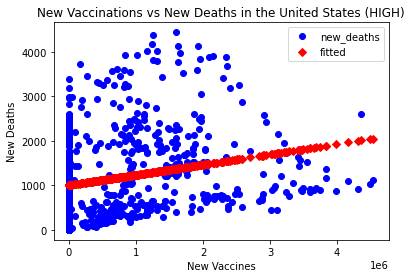

In [332]:
fig8, ax8 = plt.subplots()
fig8 = sm.graphics.plot_fit(usa_model, 1, vlines = False, ax = ax8)
ax8.set_ylabel("New Deaths")
ax8.set_xlabel("New Vaccines")
ax8.set_title("New Vaccinations vs New Deaths in the United States (HIGH)")
plt.show()

## Late Multilinear Regression

In [378]:
asia = countries_df.loc[countries_df["continent"] == "Asia"]

In [379]:
asia_model = ols('new_cases ~ new_vaccinations + population + median_age + new_deaths', data = asia).fit()
print(asia_model.summary())

                            OLS Regression Results                            
Dep. Variable:              new_cases   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.713e+04
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:00:44   Log-Likelihood:            -3.5499e+05
No. Observations:               33965   AIC:                         7.100e+05
Df Residuals:                   33960   BIC:                         7.100e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -50.3128    188.418  

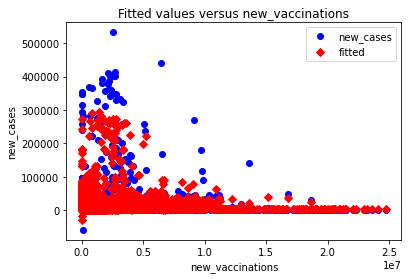

In [387]:
fig8, ax8 = plt.subplots()
fig8 = sm.graphics.plot_fit(asia_model, 1, vlines = False, ax = ax8)

In [382]:
na = countries_df.loc[countries_df["continent"] == "North America"]

In [383]:
na_model = ols('new_cases ~ new_vaccinations + population + median_age + new_deaths', data = na).fit()
print(na_model.summary())

                            OLS Regression Results                            
Dep. Variable:              new_cases   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     3999.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:02:13   Log-Likelihood:            -2.6635e+05
No. Observations:               23322   AIC:                         5.327e+05
Df Residuals:                   23317   BIC:                         5.327e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -437.3830    245.153  

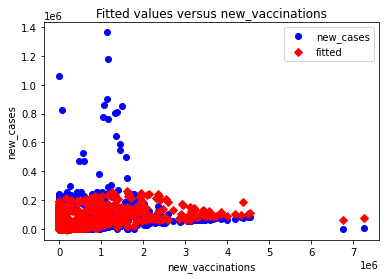

In [389]:
fig9, ax9 = plt.subplots()
fig9 = sm.graphics.plot_fit(na_model, 1, vlines = False, ax = ax9)

In [390]:
europe = countries_df.loc[countries_df["continent"] == "Europe"]

In [391]:
euro_model = ols('new_cases ~ new_vaccinations + population + median_age + new_deaths', data = europe).fit()
print(euro_model.summary())

                            OLS Regression Results                            
Dep. Variable:              new_cases   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2682.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:06:10   Log-Likelihood:            -3.7052e+05
No. Observations:               34746   AIC:                         7.411e+05
Df Residuals:                   34741   BIC:                         7.411e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -35.7768    124.420  

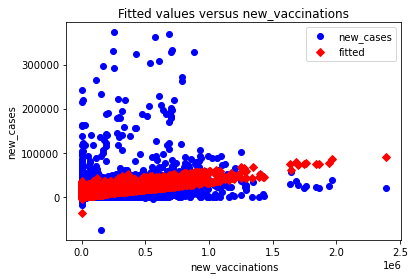

In [392]:
fig10, ax10 = plt.subplots()
fig10 = sm.graphics.plot_fit(euro_model, 1, vlines = False, ax = ax10)

In [405]:
c_df = countries_df[['new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'new_tests', 'positive_rate', 'new_vaccinations', 'population', 'median_age']]
corr = c_df.corr(method='spearman')

In [406]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

C:\Users\andre\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


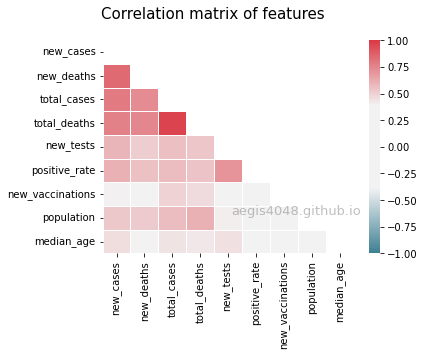

In [409]:
fig, ax = plt.subplots(figsize=(6, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()